<a href="https://colab.research.google.com/github/JCaballerot/Deep_learning_program/blob/main/Deep_learning_program/Modulo_I/fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow import keras
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [22]:
# importar la data
from keras.datasets import fashion_mnist

# leer la data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

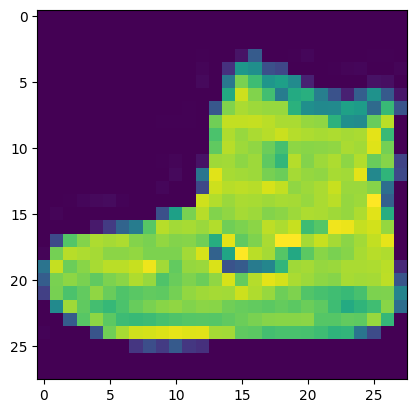

In [23]:
plt.imshow(X_train[0])

In [24]:
# aplanar imágenes en un vector unidimensional

num_pixels = X_train.shape[1] * X_train.shape[2] # encuentra el tamaño del vector unidimensional

X_train_flattened = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # aplanar imágenes de entrenamiento
X_test_flattened  = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # aplanar imágenes de prueba


In [25]:
# normalizar los input de 0-255 a 0-1
X_train = X_train/255
X_test = X_test/255

In [26]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [27]:
# one hot encode outputs
y_train_encoded = to_categorical(y_train)
y_test_encoded  = to_categorical(y_test)

num_classes = y_test_encoded.shape[1]
print(num_classes)

10


In [28]:

model = Sequential()
model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels, )))
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])


## Entrenamiento mini Batch

In [ ]:
%%time
batch_size = 12000
num_epoch = 50

#model training
history = model.fit(X_train_flattened, y_train_encoded,
                    batch_size = batch_size,
                    epochs = num_epoch,
                    verbose = 1,
                    validation_split = 0.2)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 855ms/step - accuracy: 0.2217 - loss: 120.8491 - val_accuracy: 0.4290 - val_loss: 64.3034
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 780ms/step - accuracy: 0.4849 - loss: 45.6435 - val_accuracy: 0.5735 - val_loss: 14.8240
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5798 - loss: 15.5853 - val_accuracy: 0.6656 - val_loss: 9.6610
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 766ms/step - accuracy: 0.6696 - loss: 9.4705 - val_accuracy: 0.6819 - val_loss: 8.6067
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 778ms/step - accuracy: 0.6909 - loss: 7.9647 - val_accuracy: 0.7271 - val_loss: 5.2688
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.7299 - loss: 5.3109 - val_accuracy: 0.7400 - val_loss: 4.5500
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 760ms/step - accuracy: 0.7513 - loss: 4.3267 - val_accuracy: 0.7498 - val_loss: 3.7479
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 865ms/step - accuracy: 0.7545 - loss: 3.4664 - val_accuracy: 0.7403 - val_loss:

(0.0, 2.0)

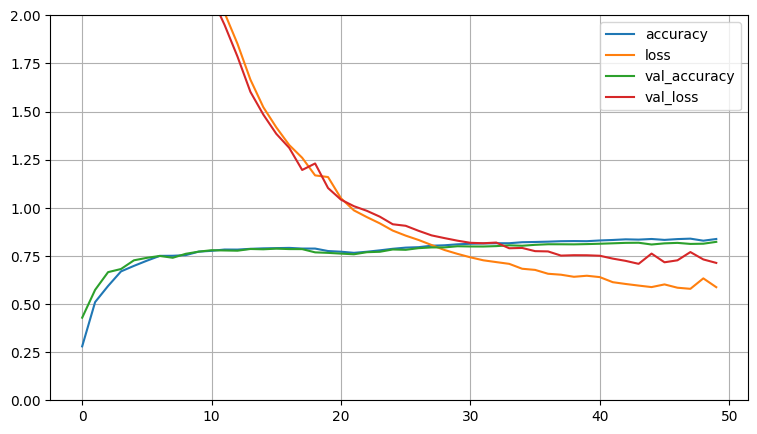

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(9, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2) # set the vertical range to [0-1] plt.show()

## Entrenamiento Batch

In [ ]:
%%time
batch_size = 48000
num_epoch = 50

#model training
history = model.fit(X_train_flattened, y_train_encoded,
                    epochs = num_epoch,
                    batch_size = batch_size,
                    verbose = 1,
                    validation_split = 0.2)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.1222 - loss: 255.9884 - val_accuracy: 0.0999 - val_loss: 205.4716
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.1015 - loss: 204.4884 - val_accuracy: 0.1969 - val_loss: 183.5779
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.1918 - loss: 183.3867 - val_accuracy: 0.2169 - val_loss: 151.6795
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2201 - loss: 149.4594 - val_accuracy: 0.3257 - val_loss: 100.6917
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.3252 - loss: 99.4715 - val_accuracy: 0.4728 - val_loss: 56.3076
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.4696 - loss: 56.1885 - val_accuracy: 0.4937 - val_loss: 52.5495
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.4911 - loss: 52.5353 - val_accuracy: 0.4761 - val_loss: 41.8689
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4837 - loss: 41.7500 - val_accuracy: 0.4675 - val_loss: 

(0.0, 250.0)

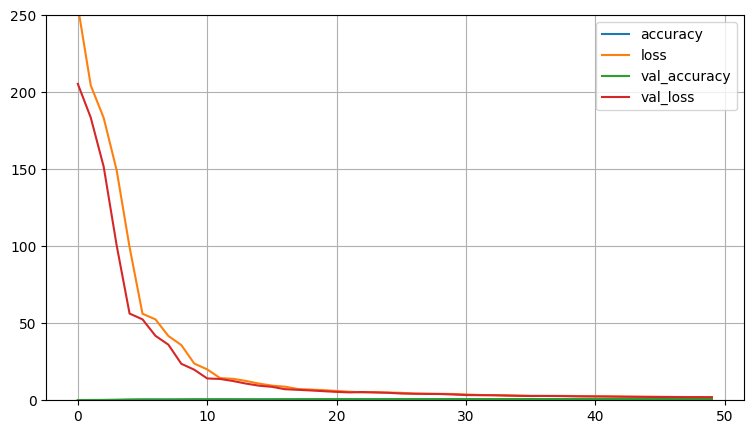

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(9, 5))
plt.grid(True)
plt.gca().set_ylim(0, 250) # set the vertical range to [0-1] plt.show()

## Entrenamiento minibatch con early stopping

In [30]:
#Definiendo parámetro de early stopping
early_stopping = keras.callbacks.EarlyStopping(patience = 20,
                                               restore_best_weights = True)


In [31]:
%%time
batch_size = 4800
num_epoch  = 500

#model training
history = model.fit(X_train_flattened, y_train_encoded,
                    epochs = num_epoch,
                    batch_size = batch_size,
                    verbose = 1,
                    validation_split = 0.2,
                    callbacks = [early_stopping])


Epoch 1/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 186ms/step - accuracy: 0.2356 - loss: 138.7980 - val_accuracy: 0.6091 - val_loss: 25.0618
Epoch 2/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5965 - loss: 27.8325 - val_accuracy: 0.7048 - val_loss: 16.8489
Epoch 3/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7091 - loss: 13.4304 - val_accuracy: 0.7602 - val_loss: 7.8820
Epoch 4/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7570 - loss: 7.5753 - val_accuracy: 0.7665 - val_loss: 5.7923
Epoch 5/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7777 - loss: 5.1796 - val_accuracy: 0.7777 - val_loss: 4.4368
Epoch 6/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7871 - loss: 4.1133 - val_accuracy: 0.7860 - val_loss: 3.6765
Epoch 7/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7968 - loss: 3.2662 - val_accuracy: 0.7974 - val_loss: 3.1822
Epoch 8/500
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8049 - loss: 2.8971 - val_accur

In [20]:

pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.868479,0.842701,0.776167,2.435549
1,0.793312,2.718158,0.823083,2.165559
2,0.849708,1.459089,0.844417,1.273547
3,0.873583,0.817606,0.852583,1.127470
4,0.878771,0.676276,0.820250,1.338605
...,...,...,...,...
73,0.945479,0.184510,0.871000,0.808115
74,0.953250,0.150599,0.864083,0.839114
75,0.944292,0.182026,0.857250,0.867968
76,0.937271,0.227528,0.857250,0.903630


(0.0, 2.0)

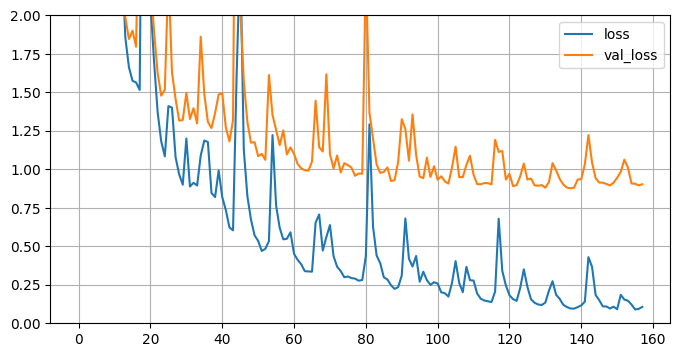

In [33]:

import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(8, 4))
plt.grid(True)
plt.gca().set_ylim(0, 2) # set the vertical range to [0-1] plt.show()


In [49]:
X_test_flattened.shape

(10000, 784)

In [50]:
X_test_flattened[0].shape

(784,)

In [51]:
X_test_flattened[0].reshape(1, 784)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

In [53]:
fashion_mnist?

In [55]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [75]:
pd.set_option('display.float_format', '{:.3f}'.format)

pd.DataFrame({'class' : class_names,
              'prediction' : model.predict(X_test_flattened[1].reshape(1, 784)).reshape(10)})

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


,class,prediction
0,T-shirt/top,0.000
1,Trouser,0.000
2,Pullover,1.000
3,Dress,0.000
4,Coat,0.000
5,Sandal,0.000
6,Shirt,0.000
7,Sneaker,0.000
8,Bag,0.000
9,Ankle boot,0.000


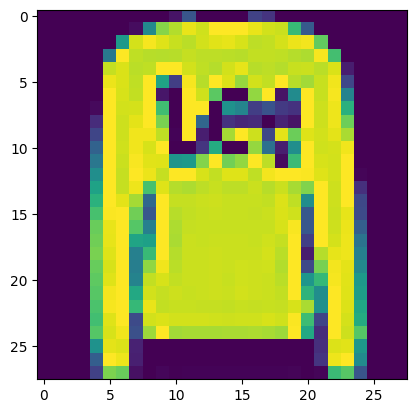

In [76]:
plt.imshow(X_test[1])

In [78]:
y_test[1]

2